<a href="https://colab.research.google.com/github/EliasSf73/test_/blob/master/KaggleCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/stat ML/Data_mining competition/train_data.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,GRADE
0,GP,F,16,U,GT3,T,1,2,teacher,other,...,yes,no,4,4,1,1,1,3,0,2
1,MS,F,16,R,LE3,T,4,3,other,other,...,yes,no,5,4,2,1,2,5,0,0
2,MS,F,18,R,GT3,T,1,1,at_home,at_home,...,yes,yes,3,2,3,1,1,2,4,2
3,MS,M,15,U,LE3,T,4,3,other,at_home,...,no,yes,5,1,5,2,1,4,0,2
4,MS,F,17,U,GT3,T,4,4,at_home,services,...,yes,no,4,3,2,1,1,5,0,1


# Analysing the data

In [ ]:
data.shape

(2438, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      2438 non-null   object
 1   sex         2438 non-null   object
 2   age         2438 non-null   int64 
 3   address     2438 non-null   object
 4   famsize     2438 non-null   object
 5   Pstatus     2438 non-null   object
 6   Medu        2438 non-null   int64 
 7   Fedu        2438 non-null   int64 
 8   Mjob        2438 non-null   object
 9   Fjob        2438 non-null   object
 10  reason      2438 non-null   object
 11  guardian    2438 non-null   object
 12  traveltime  2438 non-null   int64 
 13  studytime   2438 non-null   int64 
 14  failures    2438 non-null   int64 
 15  schoolsup   2438 non-null   object
 16  famsup      2438 non-null   object
 17  paid        2438 non-null   object
 18  activities  2438 non-null   object
 19  nursery     2438 non-null   object
 20  higher  

In [ ]:
data['nursery'].unique()

array(['yes', 'no'], dtype=object)

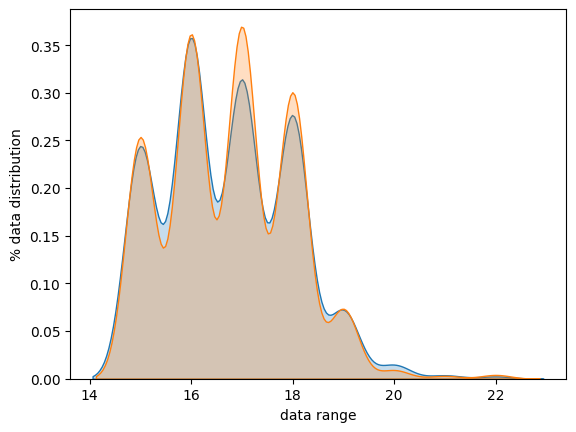

In [ ]:
sns.kdeplot(data.groupby('sex').get_group('M')['age'], shade = True,label = 'male')
sns.kdeplot(data.groupby('sex').get_group('F')['age'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')
plt.show()

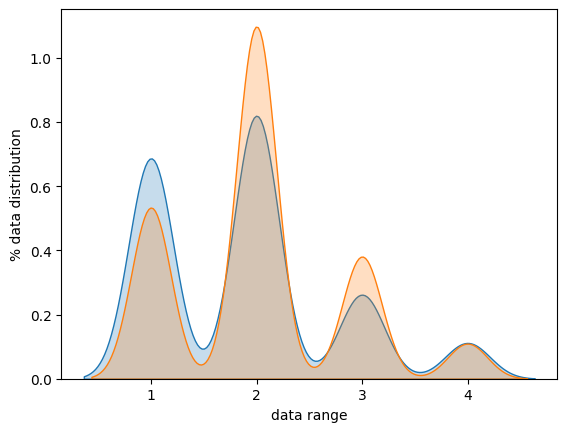

In [ ]:
train_data=data
sns.kdeplot(train_data.groupby('sex').get_group('M')['studytime'], shade = True,label = 'male')
sns.kdeplot(train_data.groupby('sex').get_group('F')['studytime'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')
plt.show()

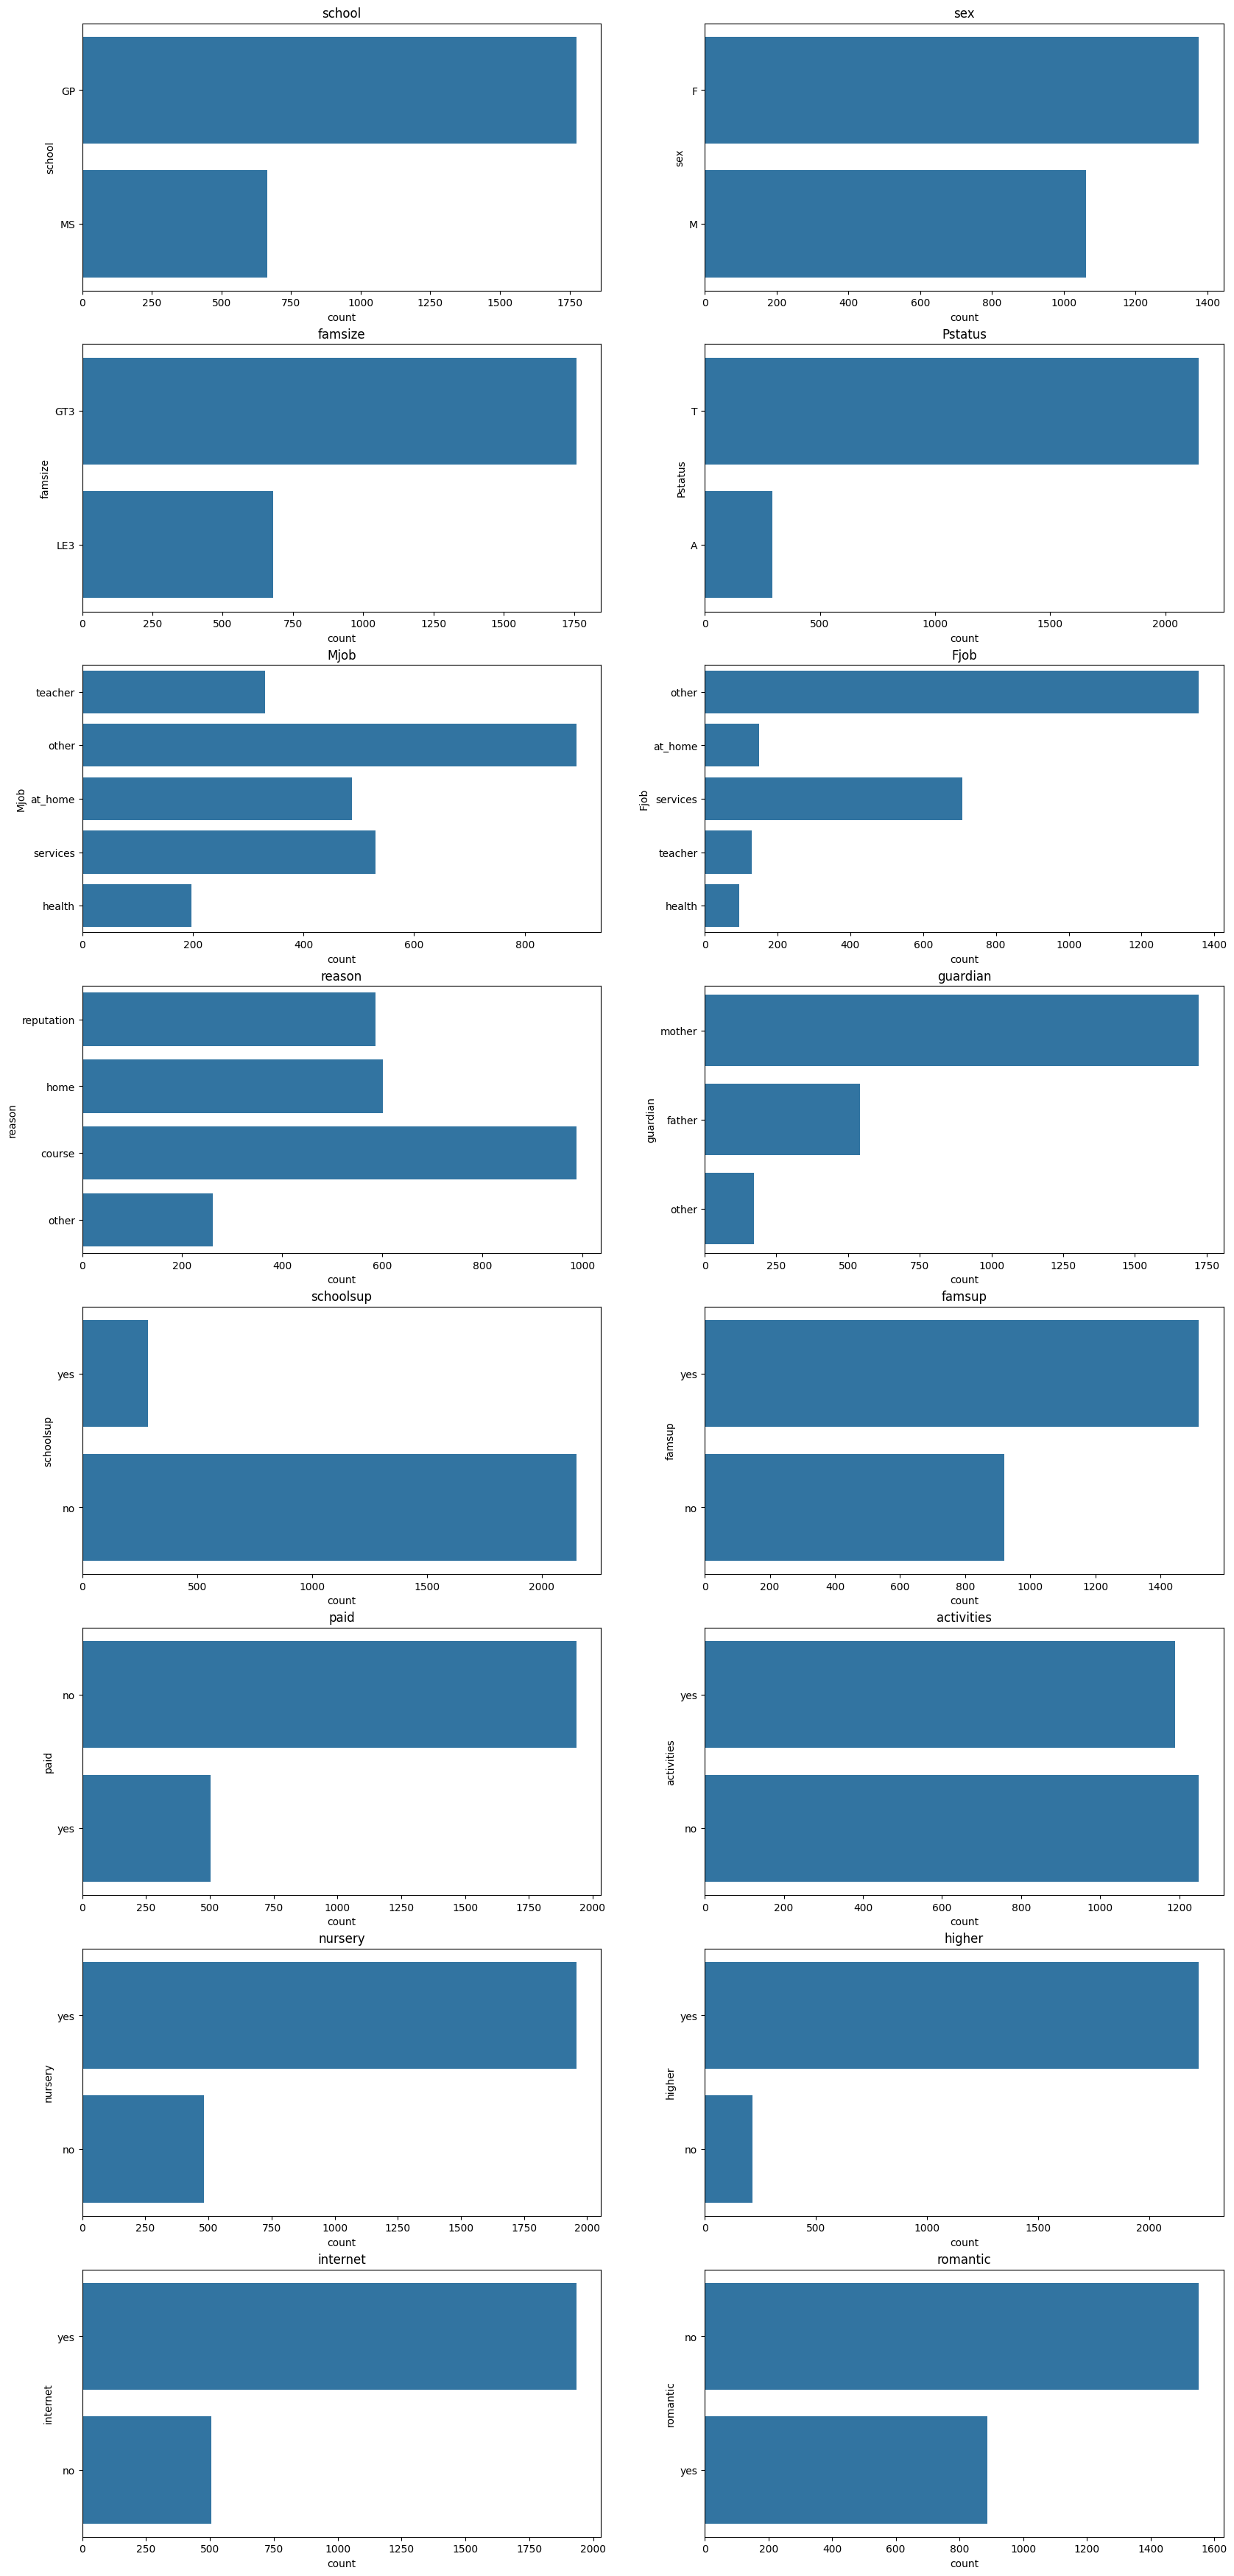

In [ ]:
plt.figure(figsize = (20,50))
for i,item in enumerate(['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']):
    plt.subplot(9,2,i+1)
    sns.countplot(train_data[item])
    plt.title(item)

plt.show()

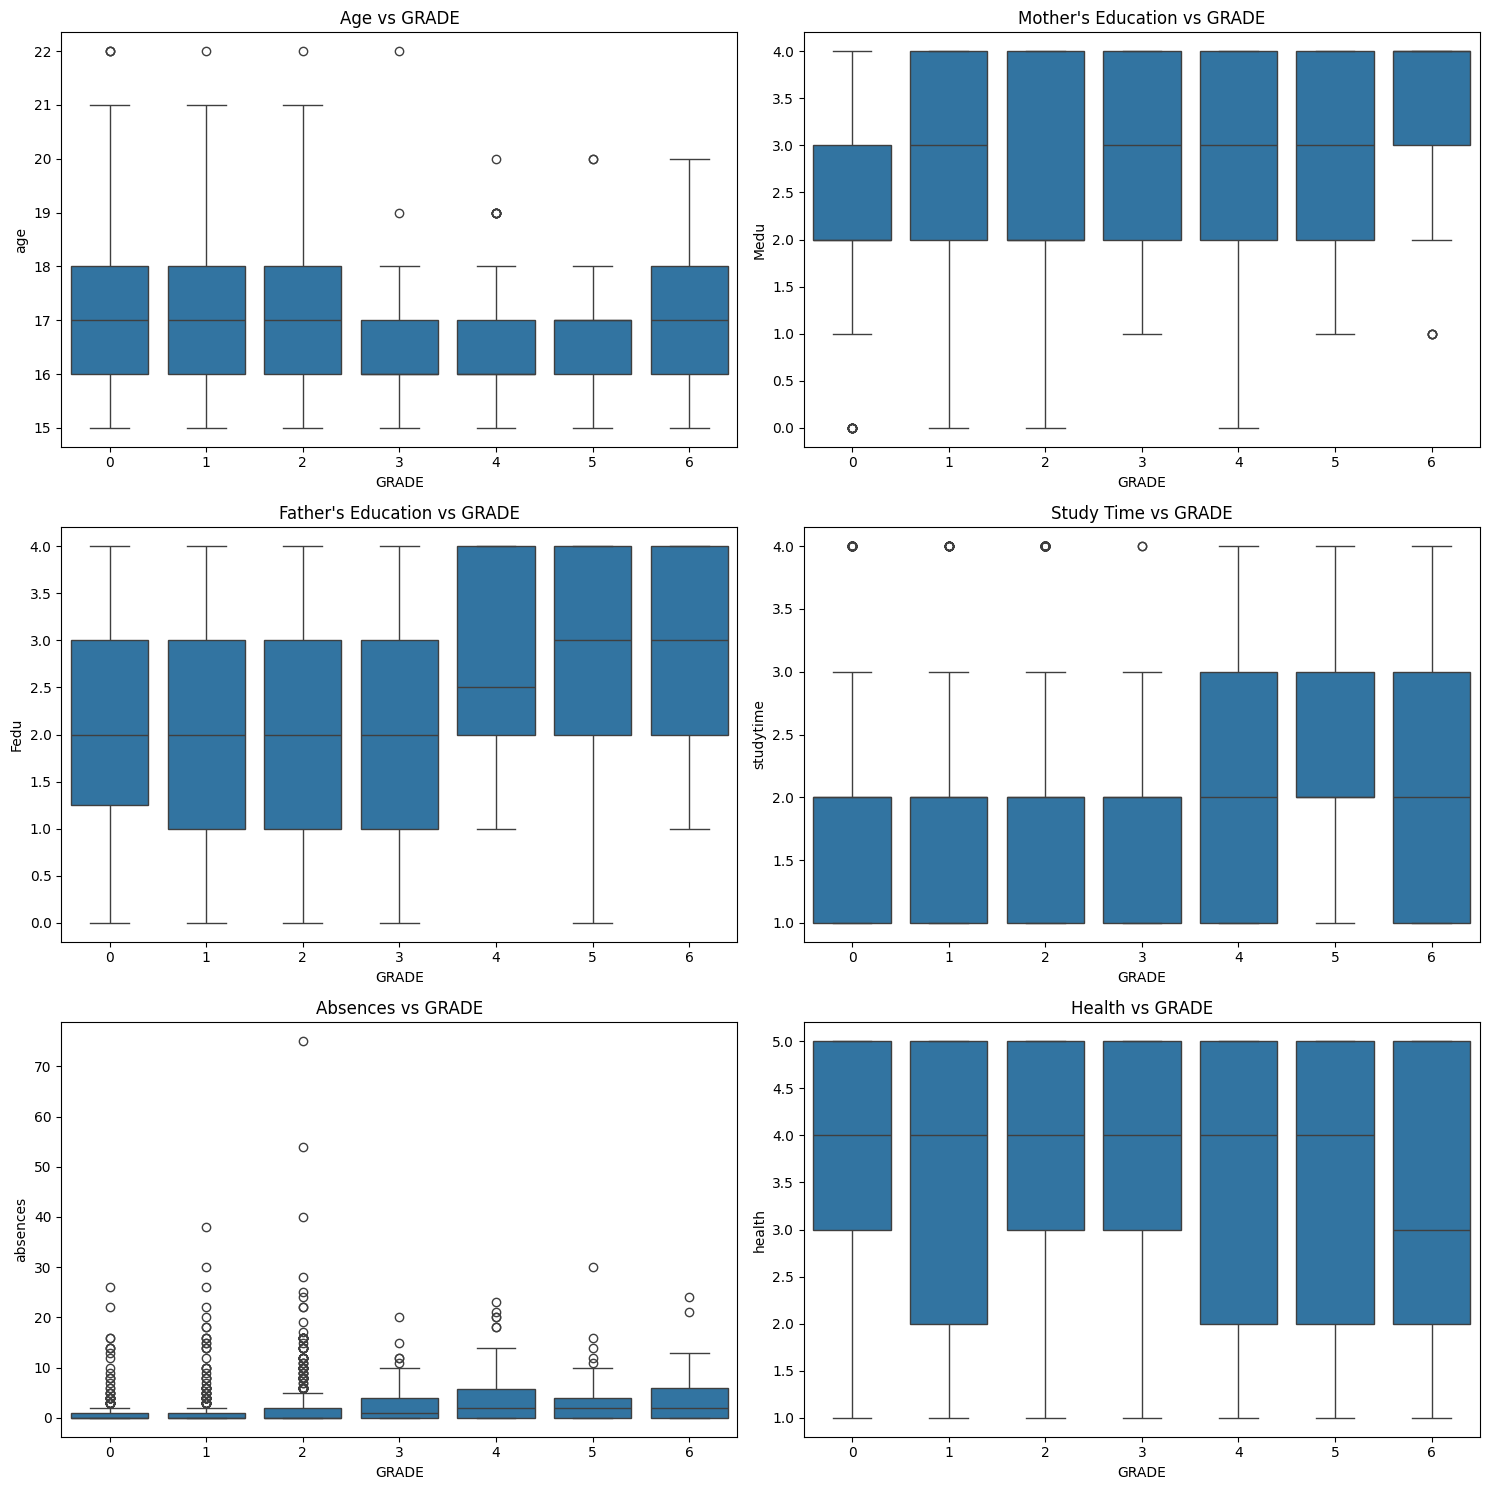

In [ ]:
# Plotting feature relationships with the target variable
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(x='GRADE', y='age', data=data, ax=axs[0, 0])
axs[0, 0].set_title('Age vs GRADE')

sns.boxplot(x='GRADE', y='Medu', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Mother\'s Education vs GRADE')

sns.boxplot(x='GRADE', y='Fedu', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Father\'s Education vs GRADE')

sns.boxplot(x='GRADE', y='studytime', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Study Time vs GRADE')

sns.boxplot(x='GRADE', y='absences', data=data, ax=axs[2, 0])
axs[2, 0].set_title('Absences vs GRADE')

sns.boxplot(x='GRADE', y='health', data=data, ax=axs[2, 1])
axs[2, 1].set_title('Health vs GRADE')

plt.tight_layout()
plt.show()

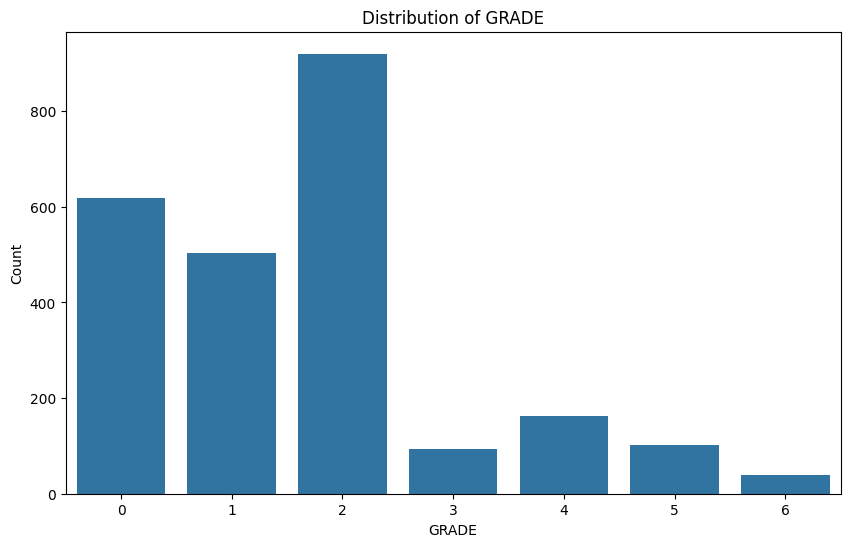

GRADE
2    37.735849
0    25.348646
1    20.672683
4     6.644791
5     4.183757
3     3.814602
6     1.599672
Name: proportion, dtype: float64


In [ ]:
# Convert 'GRADE' to categorical
data['GRADE'] = data['GRADE'].astype('category')

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='GRADE', data=data)
plt.title('Distribution of GRADE')
plt.xlabel('GRADE')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each class in the target variable
grade_counts = data['GRADE'].value_counts(normalize=True) * 100
print(grade_counts)

# Categorical features

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
data_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,16,1,2,2,2,0,4,4,1,1,...,True,False,True,True,False,True,True,True,True,False
1,16,4,3,2,2,0,5,4,2,1,...,True,False,False,False,False,False,True,True,True,False
2,18,1,1,2,1,1,3,2,3,1,...,True,False,False,False,False,False,False,False,True,True
3,15,4,3,2,1,2,5,1,5,2,...,False,False,False,True,False,True,True,False,False,True
4,17,4,4,2,1,0,4,3,2,1,...,True,False,False,True,True,False,True,False,True,False


# SMOTE to handle class-imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after applying SMOTE
print(y_train_res.value_counts())

GRADE
0    676
1    676
2    676
3    676
4    676
5    676
6    676
Name: count, dtype: int64


**Train with RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a RandomForest model without handling imbalance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("RandomForest without handling imbalance")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Train a RandomForest model with SMOTE applied
rf_model_res = RandomForestClassifier(random_state=42)
rf_model_res.fit(X_train_res, y_train_res)
y_pred_res = rf_model_res.predict(X_test)

print("RandomForest with SMOTE applied")
print(confusion_matrix(y_test, y_pred_res))
print(classification_report(y_test, y_pred_res))


RandomForest without handling imbalance
[[ 48  16  79   0   0   0   0]
 [ 37   6  84   1   1   0   0]
 [ 48  20 164   0   8   4   0]
 [  4   1  20   0   1   0   0]
 [  3   1  25   0   4   3   1]
 [  1   0  13   0   3   2   1]
 [  1   1   4   0   1   3   1]]
              precision    recall  f1-score   support

           0       0.34      0.34      0.34       143
           1       0.13      0.05      0.07       129
           2       0.42      0.67      0.52       244
           3       0.00      0.00      0.00        26
           4       0.22      0.11      0.15        37
           5       0.17      0.10      0.12        20
           6       0.33      0.09      0.14        11

    accuracy                           0.37       610
   macro avg       0.23      0.19      0.19       610
weighted avg       0.30      0.37      0.32       610

RandomForest with SMOTE applied
[[ 58  28  54   2   0   1   0]
 [ 48  20  55   1   2   2   1]
 [ 64  37 112   6  16   9   0]
 [  5   3  12   0   

# Class Weights instead of SMOTE

In [ ]:
# Train a RandomForest model with class weights
rf_model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_weighted.fit(X_train, y_train)
y_pred_rf_weighted = rf_model_weighted.predict(X_test)

print("RandomForest with class weights")
print(confusion_matrix(y_test, y_pred_rf_weighted))
print(classification_report(y_test, y_pred_rf_weighted))
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

# Train a HistGradientBoosting model with class weights
gb_model_weighted = HistGradientBoostingClassifier(random_state=42, class_weight='balanced')
gb_model_weighted.fit(X_train, y_train)
y_pred_gb_weighted = gb_model_weighted.predict(X_test)

print("HistGradientBoosting with class weights")
print(confusion_matrix(y_test, y_pred_gb_weighted))
print(classification_report(y_test, y_pred_gb_weighted))

RandomForest with class weights
[[ 48   3  92   0   0   0   0]
 [ 31   6  91   1   0   0   0]
 [ 35  17 180   0   9   3   0]
 [  4   1  19   0   2   0   0]
 [  3   2  23   0   4   4   1]
 [  1   0  14   0   2   2   1]
 [  0   1   5   0   1   3   1]]
              precision    recall  f1-score   support

           0       0.39      0.34      0.36       143
           1       0.20      0.05      0.08       129
           2       0.42      0.74      0.54       244
           3       0.00      0.00      0.00        26
           4       0.22      0.11      0.15        37
           5       0.17      0.10      0.12        20
           6       0.33      0.09      0.14        11

    accuracy                           0.40       610
   macro avg       0.25      0.20      0.20       610
weighted avg       0.33      0.40      0.33       610

HistGradientBoosting with class weights
[[ 55  37  48   0   1   2   0]
 [ 42  22  61   0   3   1   0]
 [ 59  44 116   5  14   6   0]
 [  7   3  11   0   

# Training with GBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Train and evaluate GradientBoosting model with SMOTE
gb_model_res = GradientBoostingClassifier(random_state=42)
gb_model_res.fit(X_train_res, y_train_res)
y_pred_gb_res = gb_model_res.predict(X_test)

print("GradientBoosting with SMOTE applied")
print(confusion_matrix(y_test, y_pred_gb_res))
print(classification_report(y_test, y_pred_gb_res))

# Train and evaluate XGBoost model with SMOTE
xgb_model_res = XGBClassifier(random_state=42)
xgb_model_res.fit(X_train_res, y_train_res)
y_pred_xgb_res = xgb_model_res.predict(X_test)

print("XGBoost with SMOTE applied")
print(confusion_matrix(y_test, y_pred_xgb_res))
print(classification_report(y_test, y_pred_xgb_res))


GradientBoosting with SMOTE applied
[[ 49  26  55   4   5   3   1]
 [ 37  20  54   5   4   5   4]
 [ 54  37 112  12  18   9   2]
 [  8   2   4   4   7   0   1]
 [  3   4  15   1   6   7   1]
 [  2   3   3   2   3   7   0]
 [  2   0   4   1   2   0   2]]
              precision    recall  f1-score   support

           0       0.32      0.34      0.33       143
           1       0.22      0.16      0.18       129
           2       0.45      0.46      0.46       244
           3       0.14      0.15      0.15        26
           4       0.13      0.16      0.15        37
           5       0.23      0.35      0.27        20
           6       0.18      0.18      0.18        11

    accuracy                           0.33       610
   macro avg       0.24      0.26      0.24       610
weighted avg       0.33      0.33      0.33       610

XGBoost with SMOTE applied
[[ 49  35  55   0   2   2   0]
 [ 44  18  53   3   6   3   2]
 [ 63  35 118   6  10  12   0]
 [  6   1  12   1   6   0   0

# another models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a RandomForest model without handling imbalance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("RandomForest without handling imbalance")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Train a RandomForest model with SMOTE applied
rf_model_res = RandomForestClassifier(random_state=42)
rf_model_res.fit(X_train_res, y_train_res)
y_pred_res = rf_model_res.predict(X_test)

print("RandomForest with SMOTE applied")
print(confusion_matrix(y_test, y_pred_res))
print(classification_report(y_test, y_pred_res))


RandomForest without handling imbalance
[[ 48  16  79   0   0   0   0]
 [ 37   6  84   1   1   0   0]
 [ 48  20 164   0   8   4   0]
 [  4   1  20   0   1   0   0]
 [  3   1  25   0   4   3   1]
 [  1   0  13   0   3   2   1]
 [  1   1   4   0   1   3   1]]
              precision    recall  f1-score   support

           0       0.34      0.34      0.34       143
           1       0.13      0.05      0.07       129
           2       0.42      0.67      0.52       244
           3       0.00      0.00      0.00        26
           4       0.22      0.11      0.15        37
           5       0.17      0.10      0.12        20
           6       0.33      0.09      0.14        11

    accuracy                           0.37       610
   macro avg       0.23      0.19      0.19       610
weighted avg       0.30      0.37      0.32       610

RandomForest with SMOTE applied
[[ 58  28  54   2   0   1   0]
 [ 48  20  55   1   2   2   1]
 [ 64  37 112   6  16   9   0]
 [  5   3  12   0   

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
import numpy as np



# Load and preprocess data
# train_data = pd.read_csv("train_data.csv")
one_hot_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']
encoded_data = pd.get_dummies(train_data, columns=one_hot_cols, drop_first=True)

X = encoded_data.drop('GRADE', axis=1)
y = encoded_data['GRADE']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Feature selection with RFECV
random_forest_model = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(weights='distance')
# params = {'n_neighbors': range(1, 21)}  # Testing k values from 1 to 20
# grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')  # 5-fold cross-validation
selector = RFECV(estimator=random_forest_model,step=1, cv=5,scoring='accuracy')
selector.fit(X_train_smote, y_train_smote)
X_train_selected = selector.fit_transform(X_train_smote, y_train_smote)
X_test_selected = selector.transform(X_test)

# Random Forest model setup

knn = KNeighborsClassifier(weights='distance')

# Grid search for optimal parameters
params = {'n_neighbors': [i for i in range(1, 21)]}
grid_search = GridSearchCV(estimator=knn, param_grid=params, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_selected, y_train_smote)

# Best settings
print("Best number of trees (n_neighbors):", grid_search.best_params_['n_neighbors'])
print("Best cross-validation score:", grid_search.best_score_)

# Predictions and evaluation
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_selected)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best number of trees (n_neighbors): 1
Best cross-validation score: 0.8041144729880271
[[43 33 37  8 13  8  1]
 [29 31 30 17 13  8  1]
 [44 46 74 26 27 19  8]
 [ 6  1 11  3  2  1  2]
 [ 4  1 11  5  6  7  3]
 [ 2  5  2  3  3  3  2]
 [ 0  0  2  2  2  3  2]]
              precision    recall  f1-score   support

           0       0.34      0.30      0.32       143
           1       0.26      0.24      0.25       129
           2       0.44      0.30      0.36       244
           3       0.05      0.12      0.07        26
           4       0.09      0.16      0.12        37
           5       0.06      0.15      0.09        20
           6       0.11      0.18      0.13        11

    accuracy                           0.27       610
   macro avg       0.19      0.21      0.19       610
weighted avg       0.32      0.27      0.29       610



SMOTE and KNN,**RandomForest** **bold text**

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier


X = encoded_data.drop('GRADE', axis=1)
y = encoded_data['GRADE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(f'New class distribution: {Counter(y_train_smote)}')

# Set up the KNN model and parameters for GridSearch
knn = KNeighborsClassifier(weights='distance')
params = {'n_neighbors': range(1, 21)}  # Testing k values from 1 to 20
grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Training the model with the balanced dataset using GridSearchCV to find the best k
grid_search.fit(X_train_smote, y_train_smote)
best_knn = grid_search.best_estimator_

print(f"Best K: {grid_search.best_params_['n_neighbors']}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Predicting the test set results with the best KNN model found
y_pred = best_knn.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


New class distribution: Counter({1: 676, 5: 676, 2: 676, 4: 676, 0: 676, 6: 676, 3: 676})
Best K: 1
Best Cross-Validation Score: 0.8064389381400259
[[45 31 35  9 13  9  1]
 [29 32 28 17 14  8  1]
 [45 42 75 27 28 19  8]
 [ 6  1 11  3  2  1  2]
 [ 4  1 11  5  6  7  3]
 [ 2  5  2  3  3  3  2]
 [ 0  0  2  2  2  3  2]]
              precision    recall  f1-score   support

           0       0.34      0.31      0.33       143
           1       0.29      0.25      0.27       129
           2       0.46      0.31      0.37       244
           3       0.05      0.12      0.07        26
           4       0.09      0.16      0.11        37
           5       0.06      0.15      0.09        20
           6       0.11      0.18      0.13        11

    accuracy                           0.27       610
   macro avg       0.20      0.21      0.19       610
weighted avg       0.34      0.27      0.30       610



# recent stacking

In [ ]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00


# stacking

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess the training data
# data = pd.read_csv('train_data.csv')
categorical_features = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
X = data_encoded.drop('GRADE', axis=1)
y = data_encoded['GRADE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the base models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Define the meta-model
meta_model = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('svm', svm_model)],
    final_estimator=meta_model,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict the test set
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the model
print("Stacking Model")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

# Load and preprocess the test data
test_data=pd.read_csv("/content/drive/MyDrive/stat ML/Data_mining competition/test_data.csv")
categorical_features = test_data.select_dtypes(include=['object']).columns
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)

# Ensure the test data has the same feature columns as the training data
missing_cols = set(X_train.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0
test_data_encoded = test_data_encoded[X_train.columns]

# Predict the test data using the stacking model
test_predictions_stacking = stacking_model.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('test_predictions_stacking.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")


Stacking Model
[[ 45   0  79   0   0   0   0]
 [ 23   0  78   0   0   0   0]
 [ 35   0 148   0   0   1   0]
 [  2   0  17   0   0   0   0]
 [  2   0  28   0   1   1   0]
 [  0   0  17   0   0   3   0]
 [  0   0   5   0   0   3   0]]
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       124
           1       0.00      0.00      0.00       101
           2       0.40      0.80      0.53       184
           3       0.00      0.00      0.00        19
           4       1.00      0.03      0.06        32
           5       0.38      0.15      0.21        20
           6       0.00      0.00      0.00         8

    accuracy                           0.40       488
   macro avg       0.31      0.19      0.17       488
weighted avg       0.34      0.40      0.31       488

Predictions written to test_predictions_stacking.csv


# stacking 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess the training data
# data = pd.read_csv('train_data.csv')
categorical_features = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
X = data_encoded.drop('GRADE', axis=1)
y = data_encoded['GRADE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the base models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Define the meta-model
meta_model = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('svm', svm_model)],
    final_estimator=meta_model,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict the test set
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the model
print("Stacking Model")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

# Load and preprocess the test data
test_data=pd.read_csv("/content/drive/MyDrive/stat ML/Data_mining competition/test_data.csv")
categorical_features = test_data.select_dtypes(include=['object']).columns
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)

# Ensure the test data has the same feature columns as the training data
missing_cols = set(X_train.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0
test_data_encoded = test_data_encoded[X_train.columns]

# Predict the test data using the stacking model
test_predictions_stacking = stacking_model.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('test_predictions_stacking2.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")


Stacking Model
[[ 45   0  79   0   0   0   0]
 [ 23   0  78   0   0   0   0]
 [ 35   0 148   0   0   1   0]
 [  2   0  17   0   0   0   0]
 [  2   0  28   0   1   1   0]
 [  0   0  17   0   0   3   0]
 [  0   0   5   0   0   3   0]]
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       124
           1       0.00      0.00      0.00       101
           2       0.40      0.80      0.53       184
           3       0.00      0.00      0.00        19
           4       1.00      0.03      0.06        32
           5       0.38      0.15      0.21        20
           6       0.00      0.00      0.00         8

    accuracy                           0.40       488
   macro avg       0.31      0.19      0.17       488
weighted avg       0.34      0.40      0.31       488

Predictions written to test_predictions_stacking.csv


# stacking3

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example hyperparameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Example hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Tuning RandomForest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Tuning SVM
svm_grid_search = GridSearchCV(SVC(probability=True, random_state=42), svm_param_grid, cv=5, n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_

# Stacking with the tuned models
stacking_model = StackingClassifier(
    estimators=[('rf', best_rf_model), ('svm', best_svm_model)],
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

print("Stacking Model with Tuned Base Models")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Stacking Model with Tuned Base Models
[[ 47   0  77   0   0   0   0]
 [ 25   0  76   0   0   0   0]
 [ 34   0 149   0   1   0   0]
 [  2   0  17   0   0   0   0]
 [  1   0  29   0   2   0   0]
 [  3   0  16   0   0   1   0]
 [  0   0   7   0   1   0   0]]
              precision    recall  f1-score   support

           0       0.42      0.38      0.40       124
           1       0.00      0.00      0.00       101
           2       0.40      0.81      0.54       184
           3       0.00      0.00      0.00        19
           4       0.50      0.06      0.11        32
           5       1.00      0.05      0.10        20
           6       0.00      0.00      0.00         8

    accuracy                           0.41       488
   macro avg       0.33      0.19      0.16       488
weighted avg       0.33      0.41      0.31       488



In [ ]:
test_predictions_stacking = stacking_model.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('test_predictions_stacking3.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")

Predictions written to test_predictions_stacking.csv


# stacking4

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load and preprocess the training data
# data = pd.read_csv('train_data.csv')
categorical_features = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
X = data_encoded.drop('GRADE', axis=1)
scaler=StandardScaler()
X=scaler.fit_transform(X)
y = data_encoded['GRADE']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define additional base models
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

# Example hyperparameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Example hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Tuning RandomForest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Tuning SVM
svm_grid_search = GridSearchCV(SVC(probability=True, random_state=42), svm_param_grid, cv=5, n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_

# Stacking with more base models
stacking_model = StackingClassifier(
    estimators=[('rf', best_rf_model), ('svm', best_svm_model), ('gb', gb_model), ('xgb', xgb_model)],
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

print("Stacking Model with More Base Models")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Stacking Model with More Base Models
[[ 49   1  74   0   0   0   0]
 [ 29   0  72   0   0   0   0]
 [ 36   0 146   0   1   1   0]
 [  2   0  17   0   0   0   0]
 [  1   0  29   0   0   2   0]
 [  0   0  15   0   1   3   1]
 [  1   0   5   0   0   1   1]]
              precision    recall  f1-score   support

           0       0.42      0.40      0.40       124
           1       0.00      0.00      0.00       101
           2       0.41      0.79      0.54       184
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        32
           5       0.43      0.15      0.22        20
           6       0.50      0.12      0.20         8

    accuracy                           0.41       488
   macro avg       0.25      0.21      0.20       488
weighted avg       0.29      0.41      0.32       488



In [ ]:
# Load and preprocess the test data
test_data=pd.read_csv("/content/drive/MyDrive/stat ML/Data_mining competition/test_data.csv")
categorical_features = test_data.select_dtypes(include=['object']).columns
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)

# Ensure the test data has the same feature columns as the training data
missing_cols = set(X_train.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0
test_data_encoded = test_data_encoded[X_train.columns]
test_data_encoded = scaler.transform(test_data_encoded)
# Predict the test data using the stacking model
test_predictions_stacking = stacking_model.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('test_predictions_stacking2.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")


In [ ]:
test_predictions_stacking = stacking_model.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('test_predictions_stacking4.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")

Predictions written to test_predictions_stacking.csv


# stack5

In [ ]:
meta_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']
}

meta_grid_search = GridSearchCV(LogisticRegression(), meta_param_grid, cv=5, n_jobs=-1, verbose=2)
meta_grid_search.fit(X_train, y_train)
best_meta_model = meta_grid_search.best_estimator_

stacking_model = StackingClassifier(
    estimators=[('rf', best_rf_model), ('svm', best_svm_model), ('gb', gb_model), ('xgb', xgb_model)],
    final_estimator=best_meta_model,
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

print("Stacking Model with Tuned Meta-Model")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


NameError: name 'gb_model' is not defined

In [ ]:
test_predictions_stacking = stacking_model.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('test_predictions_stacking5.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")

Predictions written to test_predictions_stacking.csv


# stack6

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Define additional base models
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Stacking with more base models
stacking_model = StackingClassifier(
    estimators=[('rf', best_rf_model), ('svm', best_svm_model), ('gb', gb_model), ('xgb', xgb_model)],
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

print("Stacking Model with More Base Models")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))


Stacking Model with More Base Models
[[ 48   1  75   0   0   0   0]
 [ 27   0  74   0   0   0   0]
 [ 38   0 144   0   1   1   0]
 [  2   0  17   0   0   0   0]
 [  1   0  29   0   0   2   0]
 [  0   0  15   0   1   3   1]
 [  1   0   5   0   0   1   1]]
              precision    recall  f1-score   support

           0       0.41      0.39      0.40       124
           1       0.00      0.00      0.00       101
           2       0.40      0.78      0.53       184
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        32
           5       0.43      0.15      0.22        20
           6       0.50      0.12      0.20         8

    accuracy                           0.40       488
   macro avg       0.25      0.21      0.19       488
weighted avg       0.28      0.40      0.31       488



In [ ]:
test_predictions_stacking = stacking_model.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('test_predictions_stacking6.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")

Predictions written to test_predictions_stacking.csv


# stacking7

In [ ]:
from sklearn.ensemble import StackingClassifier

# First-level models
level1_estimators = [
    ('rf', best_rf_model),
    ('svm', best_svm_model),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

# First-level stacking model
level1_stacking = StackingClassifier(
    estimators=level1_estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train first-level stacking model
level1_stacking.fit(X_train, y_train)

# Predictions from first-level model
level1_train_predictions = level1_stacking.predict(X_train)
level1_test_predictions = level1_stacking.predict(X_test)

# Second-level stacking model
level2_stacking = StackingClassifier(
    estimators=[('level1', level1_stacking)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train second-level stacking model
level2_stacking.fit(X_train, y_train)

# Evaluate second-level stacking model
y_pred_level2_stacking = level2_stacking.predict(X_test)
print("Multi-Level Stacking Model")
print(confusion_matrix(y_test, y_pred_level2_stacking))
print(classification_report(y_test, y_pred_level2_stacking))


Multi-Level Stacking Model
[[ 47   0  77   0   0   0   0]
 [ 29   0  72   0   0   0   0]
 [ 38   0 146   0   0   0   0]
 [  2   0  17   0   0   0   0]
 [  0   0  30   0   0   2   0]
 [  0   0  17   0   0   3   0]
 [  0   0   6   0   1   1   0]]
              precision    recall  f1-score   support

           0       0.41      0.38      0.39       124
           1       0.00      0.00      0.00       101
           2       0.40      0.79      0.53       184
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        32
           5       0.50      0.15      0.23        20
           6       0.00      0.00      0.00         8

    accuracy                           0.40       488
   macro avg       0.19      0.19      0.16       488
weighted avg       0.27      0.40      0.31       488



In [ ]:
test_predictions_stacking = level2_stacking.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('test_predictions_stacking7.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")

Predictions written to test_predictions_stacking.csv


# bayesian optimization

In [ ]:
!pip install optuna


In [ ]:
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess the training data
# data = pd.read_csv('train_data.csv')
categorical_features = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
X = data_encoded.drop('GRADE', axis=1)
y = data_encoded['GRADE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the objective function for Optuna
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['RandomForest', 'SVC', 'LogisticRegression'])
    if classifier_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    elif classifier_name == 'SVC':
        C = trial.suggest_float('C', 1e-3, 1e3, log=True)
        gamma = trial.suggest_float('gamma', 1e-4, 1e1, log=True)
        clf = SVC(C=C, gamma=gamma, probability=True, random_state=42)
    else:
        C = trial.suggest_float('C', 1e-3, 1e3, log=True)
        solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])
        clf = LogisticRegression(C=C, solver=solver, random_state=42)

    score = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
    return score.mean()

# Create the study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Best trial:', study.best_trial.params)

# Train the best model from Optuna
best_params = study.best_trial.params
if best_params['classifier'] == 'RandomForest':
    best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
elif best_params['classifier'] == 'SVC':
    best_model = SVC(C=best_params['C'], gamma=best_params['gamma'], probability=True, random_state=42)
else:
    best_model = LogisticRegression(C=best_params['C'], solver=best_params['solver'], random_state=42)

best_model.fit(X_train, y_train)
y_pred_optuna = best_model.predict(X_test)

print("Model with Bayesian Optimization (Optuna)")
print(confusion_matrix(y_test, y_pred_optuna))
print(classification_report(y_test, y_pred_optuna))


[I 2024-05-19 13:09:10,941] A new study created in memory with name: no-name-b8e0e8f6-d918-4037-99fe-c8091f5f0382
[I 2024-05-19 13:09:12,538] Trial 0 finished with value: 0.37948717948717947 and parameters: {'classifier': 'LogisticRegression', 'C': 0.033244073373381026, 'solver': 'liblinear'}. Best is trial 0 with value: 0.37948717948717947.
[I 2024-05-19 13:09:27,485] Trial 1 finished with value: 0.37743589743589745 and parameters: {'classifier': 'SVC', 'C': 0.022668355938340636, 'gamma': 4.249943433561304}. Best is trial 0 with value: 0.37948717948717947.
[I 2024-05-19 13:09:28,025] Trial 2 finished with value: 0.38 and parameters: {'classifier': 'LogisticRegression', 'C': 22.780824770497563, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.38.
[I 2024-05-19 13:09:40,100] Trial 3 finished with value: 0.3779487179487179 and parameters: {'classifier': 'SVC', 'C': 2.072746762195536, 'gamma': 0.001540032366435197}. Best is trial 2 with value: 0.38.
[I 2024-05-19 13:09:56,290] Trial 4 fi

Best trial: {'classifier': 'RandomForest', 'n_estimators': 63, 'max_depth': 10}
Model with Bayesian Optimization (Optuna)
[[ 40   5  79   0   0   0   0]
 [ 18   5  78   0   0   0   0]
 [ 26   6 151   1   0   0   0]
 [  3   0  15   0   0   1   0]
 [  2   0  28   1   0   1   0]
 [  2   0  16   0   1   1   0]
 [  0   0   5   0   2   0   1]]
              precision    recall  f1-score   support

           0       0.44      0.32      0.37       124
           1       0.31      0.05      0.09       101
           2       0.41      0.82      0.54       184
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        32
           5       0.33      0.05      0.09        20
           6       1.00      0.12      0.22         8

    accuracy                           0.41       488
   macro avg       0.36      0.20      0.19       488
weighted avg       0.36      0.41      0.32       488



In [ ]:
test_predictions_stacking = best_model.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('bayes_optuna.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")

Predictions written to test_predictions_stacking.csv


In [ ]:
# Add more base models and integrate Optuna results
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Stacking with the tuned models
stacking_model = StackingClassifier(
    estimators=[
        ('rf', best_model if best_params['classifier'] == 'RandomForest' else RandomForestClassifier(random_state=42)),
        ('svm', best_model if best_params['classifier'] == 'SVC' else SVC(probability=True, random_state=42)),
        ('gb', gb_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

print("Stacking Model with Tuned Base Models and More Base Models")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))


Stacking Model with Tuned Base Models and More Base Models
[[ 52   1  71   0   0   0   0]
 [ 29   0  72   0   0   0   0]
 [ 37   0 145   0   1   1   0]
 [  2   0  17   0   0   0   0]
 [  1   0  29   0   0   2   0]
 [  1   0  14   0   1   3   1]
 [  0   0   6   0   0   1   1]]
              precision    recall  f1-score   support

           0       0.43      0.42      0.42       124
           1       0.00      0.00      0.00       101
           2       0.41      0.79      0.54       184
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        32
           5       0.43      0.15      0.22        20
           6       0.50      0.12      0.20         8

    accuracy                           0.41       488
   macro avg       0.25      0.21      0.20       488
weighted avg       0.29      0.41      0.32       488



In [ ]:
test_predictions_stacking = stacking_model.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('stacking8.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")

Predictions written to test_predictions_stacking.csv


# Data Augmmentation

# feature engineering

In [ ]:
# Feature Engineering Example: Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
!pip install hyperopt

# Bayes optim with hyperplot

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope

# Load and preprocess the training data
# data = pd.read_csv('train_data.csv')
categorical_features = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
X = data_encoded.drop('GRADE', axis=1)
y = data_encoded['GRADE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the objective function for Hyperopt
def objective(space):
    if space['classifier'] == 'rf':
        clf = RandomForestClassifier(
            n_estimators=int(space['n_estimators']),
            max_depth=int(space['max_depth']),
            min_samples_split=int(space['min_samples_split']),
            min_samples_leaf=int(space['min_samples_leaf']),
            random_state=42
        )
    elif space['classifier'] == 'svm':
        clf = SVC(
            C=space['C'],
            gamma=space['gamma'],
            kernel=space['kernel'],
            probability=True,
            random_state=42
        )
    else:
        clf = LogisticRegression(
            C=space['C'],
            solver=space['solver'],
            random_state=42
        )

    score = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
    return {'loss': -score.mean(), 'status': STATUS_OK}

# Define the search space
space = hp.choice('classifier_type', [
    {
        'classifier': 'rf',
        'n_estimators': scope.int(hp.quniform('n_estimators_rf', 50, 200, 10)),
        'max_depth': scope.int(hp.quniform('max_depth_rf', 3, 20, 1)),
        'min_samples_split': scope.int(hp.quniform('min_samples_split_rf', 2, 10, 1)),
        'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf_rf', 1, 4, 1))
    },
    {
        'classifier': 'svm',
        'C': hp.loguniform('C_svm', -3, 3),
        'gamma': hp.loguniform('gamma_svm', -4, 1),
        'kernel': hp.choice('kernel_svm', ['linear', 'rbf'])
    },
    {
        'classifier': 'logreg',
        'C': hp.loguniform('C_logreg', -3, 3),
        'solver': hp.choice('solver_logreg', ['liblinear', 'lbfgs'])
    }
])

# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
print("Best Hyperparameters:", best)

# Extract the best classifier and its parameters
classifier_type = best['classifier_type']
if classifier_type == 0:
    best_model = RandomForestClassifier(
        n_estimators=int(best['n_estimators_rf']),
        max_depth=int(best['max_depth_rf']),
        min_samples_split=int(best['min_samples_split_rf']),
        min_samples_leaf=int(best['min_samples_leaf_rf']),
        random_state=42
    )
elif classifier_type == 1:
    best_model = SVC(
        C=best['C_svm'],
        gamma=best['gamma_svm'],
        kernel=['kernel_svm'],
        probability=True,
        random_state=42
    )
else:
    best_model = LogisticRegression(
        C=best['C_logreg'],
        solver=best['solver_logreg'],
        random_state=42
    )

# Train the best model from Hyperopt
best_model.fit(X_train, y_train)
y_pred_optuna = best_model.predict(X_test)

print("Model with Bayesian Optimization (Hyperopt)")
print(confusion_matrix(y_test, y_pred_optuna))
print(classification_report(y_test, y_pred_optuna))


100%|██████████| 50/50 [03:06<00:00,  3.73s/trial, best loss: -0.40205128205128204]
Best Hyperparameters: {'classifier_type': 0, 'max_depth_rf': 20.0, 'min_samples_leaf_rf': 4.0, 'min_samples_split_rf': 10.0, 'n_estimators_rf': 190.0}
Model with Bayesian Optimization (Hyperopt)
[[ 39   2  83   0   0   0   0]
 [ 24   1  76   0   0   0   0]
 [ 30   1 153   0   0   0   0]
 [  3   0  16   0   0   0   0]
 [  0   0  31   0   0   1   0]
 [  4   0  15   0   0   1   0]
 [  0   0   7   0   1   0   0]]
              precision    recall  f1-score   support

           0       0.39      0.31      0.35       124
           1       0.25      0.01      0.02       101
           2       0.40      0.83      0.54       184
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        32
           5       0.50      0.05      0.09        20
           6       0.00      0.00      0.00         8

    accuracy                           0.40       488
   macro avg   

In [ ]:
test_predictions_stacking = best_model.predict(test_data_encoded)

# Create a DataFrame for the predictions
test_results_stacking = pd.DataFrame({'ID': test_data.index, 'GRADE': test_predictions_stacking})

# Write the predictions to a CSV file
test_results_stacking.to_csv('Bayes_hyperplot.csv', index=False)

print("Predictions written to test_predictions_stacking.csv")

Predictions written to test_predictions_stacking.csv


# stack9: with different meta-models

In [ ]:
# Add more base models and integrate Hyperopt results
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Define the meta-model
meta_model = XGBClassifier(random_state=42)

# Stacking with the tuned models
stacking_model = StackingClassifier(
    estimators=[
        ('rf', best_model if classifier_type == 0 else RandomForestClassifier(random_state=42)),
        ('svm', best_model if classifier_type == 1 else SVC(probability=True, random_state=42)),
        ('gb', gb_model),
        ('xgb', xgb_model)
    ],
    final_estimator=meta_model,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stacking = stacking_model.predict(X_test)

print("Stacking Model with Advanced Meta-Model")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))


Stacking Model with Advanced Meta-Model
[[ 42  19  62   0   1   0   0]
 [ 24  15  62   0   0   0   0]
 [ 48  28 100   0   4   3   1]
 [  3   3  10   0   2   1   0]
 [  5   4  19   0   2   2   0]
 [  3   2  11   0   1   3   0]
 [  1   1   4   0   1   1   0]]
              precision    recall  f1-score   support

           0       0.33      0.34      0.34       124
           1       0.21      0.15      0.17       101
           2       0.37      0.54      0.44       184
           3       0.00      0.00      0.00        19
           4       0.18      0.06      0.09        32
           5       0.30      0.15      0.20        20
           6       0.00      0.00      0.00         8

    accuracy                           0.33       488
   macro avg       0.20      0.18      0.18       488
weighted avg       0.29      0.33      0.30       488



**numerical features vs target relationship**

**Categorical features**

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
data_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,16,1,2,2,2,0,4,4,1,1,...,True,False,True,True,False,True,True,True,True,False
1,16,4,3,2,2,0,5,4,2,1,...,True,False,False,False,False,False,True,True,True,False
2,18,1,1,2,1,1,3,2,3,1,...,True,False,False,False,False,False,False,False,True,True
3,15,4,3,2,1,2,5,1,5,2,...,False,False,False,True,False,True,True,False,False,True
4,17,4,4,2,1,0,4,3,2,1,...,True,False,False,True,True,False,True,False,True,False


**split data**

In [ ]:
from sklearn.model_selection import train_test_split
X = data_encoded.drop('GRADE', axis=1)
y = data_encoded['GRADE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

**apply SMOTE to handle imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after applying SMOTE
print(y_train_res.value_counts())


GRADE
0    736
1    736
2    736
3    736
4    736
5    736
6    736
Name: count, dtype: int64


**Training with RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a RandomForest model without handling imbalance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("RandomForest without handling imbalance")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Train a RandomForest model with SMOTE applied
rf_model_res = RandomForestClassifier(random_state=42)
rf_model_res.fit(X_train_res, y_train_res)
y_pred_res = rf_model_res.predict(X_test)

print("RandomForest with SMOTE applied")
print(confusion_matrix(y_test, y_pred_res))
print(classification_report(y_test, y_pred_res))


RandomForest without handling imbalance
[[ 42  11  70   1   0   0   0]
 [ 23  11  67   0   0   0   0]
 [ 39  13 125   1   4   2   0]
 [  2   1  15   0   1   0   0]
 [  2   0  24   2   1   3   0]
 [  1   0  13   0   2   4   0]
 [  0   0   3   0   3   1   1]]
              precision    recall  f1-score   support

           0       0.39      0.34      0.36       124
           1       0.31      0.11      0.16       101
           2       0.39      0.68      0.50       184
           3       0.00      0.00      0.00        19
           4       0.09      0.03      0.05        32
           5       0.40      0.20      0.27        20
           6       1.00      0.12      0.22         8

    accuracy                           0.38       488
   macro avg       0.37      0.21      0.22       488
weighted avg       0.35      0.38      0.33       488

RandomForest with SMOTE applied
[[51 26 42  2  2  1  0]
 [38 24 35  1  2  0  1]
 [54 34 79  4 10  3  0]
 [ 5  2  9  0  1  2  0]
 [ 2  5 16  2  3 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print("RandomForest with best parameters and SMOTE applied")
print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForest with best parameters and SMOTE applied
[[48 27 45  2  2  0  0]
 [39 23 38  0  1  0  0]
 [51 27 87  5  9  5  0]
 [ 5  2  8  0  1  3  0]
 [ 4  3 16  2  3  4  0]
 [ 2  1  7  1  4  4  1]
 [ 1  1  1  0  3  1  1]]
              precision    recall  f1-score   support

           0       0.32      0.39      0.35       124
           1       0.27      0.23      0.25       101
           2       0.43      0.47      0.45       184
           3       0.00      0.00      0.00        19
           4       0.13      0.09      0.11        32
           5       0.24      0.20      0.22        20
           6       0.50      0.12      0.20         8

    accuracy                           0.34       488
   macro avg       0.27      0.22      0.23       488
weighted avg       0.33      0.34      0.33       488



In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Combine models into a Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model), ('xgb', xgb_model)], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_voting = voting_clf.predict(X_test)

print("Voting Classifier with SMOTE applied")
print(confusion_matrix(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))


Voting Classifier with SMOTE applied
[[49 26 44  3  2  0  0]
 [33 22 41  2  2  1  0]
 [46 29 87  5 13  3  1]
 [ 3  0 11  1  2  2  0]
 [ 2  5 18  2  1  4  0]
 [ 3  0  9  0  3  4  1]
 [ 1  0  1  1  3  1  1]]
              precision    recall  f1-score   support

           0       0.36      0.40      0.38       124
           1       0.27      0.22      0.24       101
           2       0.41      0.47      0.44       184
           3       0.07      0.05      0.06        19
           4       0.04      0.03      0.03        32
           5       0.27      0.20      0.23        20
           6       0.33      0.12      0.18         8

    accuracy                           0.34       488
   macro avg       0.25      0.21      0.22       488
weighted avg       0.32      0.34      0.33       488



In [ ]:
# Get misclassified samples
misclassified_samples = X_test[y_test != y_pred_best_rf]

# Analyze misclassified samples (example)
print(misclassified_samples.head())


      age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
409    16     4     1           1          1         0       4         4   
1844   18     4     4           1          1         1       4         4   
1571   18     2     3           2          2         0       4         3   
575    18     4     4           1          3         0       4         4   
959    17     4     1           1          2         2       5         5   

      goout  Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  \
409       4     1  ...             True           False          False   
1844      4     4  ...            False           False          False   
1571      4     2  ...             True           False          False   
575       3     1  ...             True           False          False   
959       2     4  ...             True           False          False   

      famsup_yes  paid_yes  activities_yes  nursery_yes  higher_yes  \
409         True     False 

In [ ]:
# Compare actual vs predicted classes for misclassified samples
misclassified_samples['actual'] = y_test[y_test != y_pred_best_rf]
misclassified_samples['predicted'] = y_pred_best_rf[y_test != y_pred_best_rf]

print(misclassified_samples[['actual', 'predicted']].head())


     actual  predicted
409       0          2
1844      1          2
1571      2          0
575       1          2
959       2          0


In [ ]:
test=pd.read_csv("/content/drive/MyDrive/stat ML/Data_mining competition/test_data.csv")

test_categorical_features = test.select_dtypes(include=['object']).columns
test_encoded = pd.get_dummies(test, columns=categorical_features, drop_first=True)
test_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,2,4,2,1,0,4,3,3,1,...,True,False,False,False,False,True,True,True,False,False
1,18,1,2,2,1,1,4,5,3,1,...,False,True,True,False,True,False,True,True,True,False
2,16,4,4,2,2,0,4,1,5,1,...,False,True,False,True,False,True,False,True,True,False
3,17,2,2,1,2,1,3,3,1,1,...,False,False,False,True,False,False,True,True,True,True
4,16,3,2,1,1,1,5,4,5,1,...,True,False,False,False,False,True,True,True,True,True
